In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#Đọc dữ và chia dữ liệu
df = pd.read_excel("../Data/Cutomer_Churn.xls");
X = df[:][["Age","Tenure","Balance","HasCrCard","IsActiveMember","EstimatedSalary"]]
y = df[:]["Exited"]


In [2]:
from sklearn.model_selection import train_test_split
#Chia dữ liêu thành tập Train và Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500)

--------------------Trước khi Xử lí dữ liệu-----------------------------
Kết quả sau khi Test: 80.60 % với var_smoothing = 1e-15


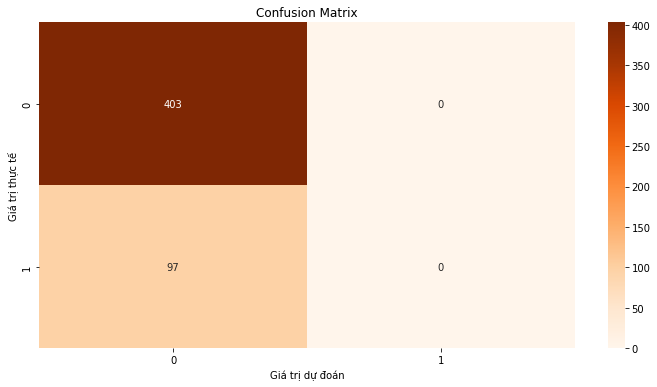

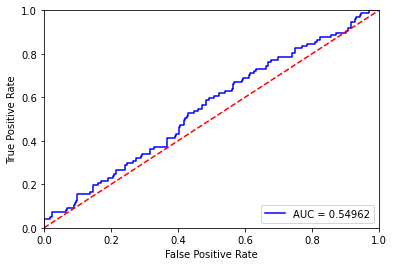

In [3]:
#NaiveBayes
        
naibay = GaussianNB(var_smoothing= 1e-5)
#Huấn luyện
naibay.fit(X_train,y_train);
#Test
y_pred = naibay.predict(X_test)

print("--------------------Trước khi Xử lí dữ liệu-----------------------------")
print("Kết quả sau khi Test: %.2f %%" %(100*accuracy_score(y_test, y_pred)),"với var_smoothing = 1e-15",)

#confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.ylabel("Giá trị thực tế")
plt.xlabel("Giá trị dự đoán")
plt.show()
        
#ROC curve
y_pred_proba = naibay.predict_proba(X_test)[::,1]
fpr, tpr,_ =roc_curve(y_test,  y_pred_proba)
plot = auc(fpr,tpr)

#create ROC curve
plt.plot(fpr,tpr,'b',label = 'AUC = %0.5f' % plot)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

#-------------------------------------------------------

pipeline_nb = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=6)),
                    ('nb', GaussianNB(var_smoothing = 1e-5))])
#Huấn luyện
pipeline_nb.fit(X_train,y_train);
#Test
y_pred2 = pipeline_nb.predict(X_test)


-------------------------Sau khi Xử lí dữ liệu-----------------------------
Kết quả sau khi Test: 83.20 % với var_smoothing = 1e-15


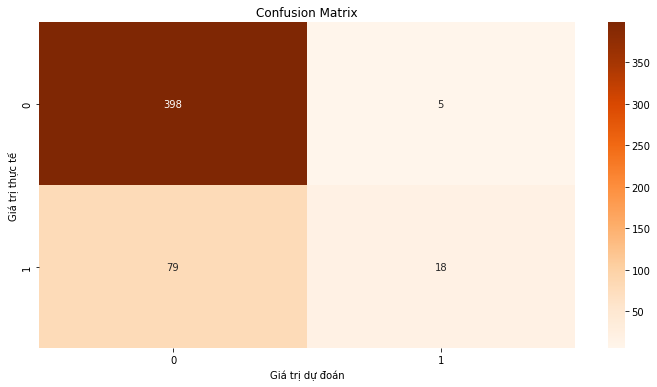

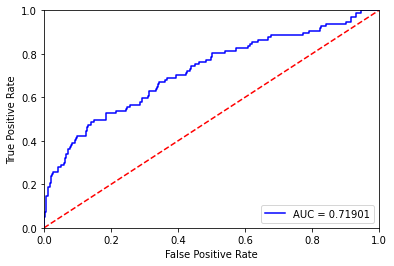

In [4]:
print("-------------------------Sau khi Xử lí dữ liệu-----------------------------")
print("Kết quả sau khi Test: %.2f %%" %(100*accuracy_score(y_test, y_pred2)),"với var_smoothing = 1e-15",)

#confusion_matrix 
cm = confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.ylabel("Giá trị thực tế")
plt.xlabel("Giá trị dự đoán")
plt.show()
        
#ROC curve
y_pred_proba = pipeline_nb.predict_proba(X_test)[::,1]
fpr, tpr,_ =roc_curve(y_test,  y_pred_proba)
plot = auc(fpr,tpr)

#create ROC curve
plt.plot(fpr,tpr,'b',label = 'AUC = %0.5f' % plot)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [5]:
import openpyxl

path = 'Kết Quả.xlsx'

kq = pd.read_excel(path, sheet_name = "NaiveBayes")

row = kq.shape[0]

workbook = openpyxl.load_workbook(path);

add = pd.DataFrame({
    'Lần thứ' : [row+1],
    'Kết quả' : [accuracy_score(y_test,y_pred2)]
})


with pd.ExcelWriter(path,mode="a",engine="openpyxl",if_sheet_exists="overlay") as writer:
    add.to_excel(writer, sheet_name="NaiveBayes",header=None, startrow=row+1,index=False)

kq = pd.read_excel(path, sheet_name = "NaiveBayes")   
kq


,Lần thứ,Kết quả
0,1,0.824
1,2,0.804
2,3,0.802
3,4,0.802
4,5,0.784
5,6,0.820
6,7,0.778
7,8,0.800
8,9,0.788
9,10,0.808
